In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
#Data import
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


**EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-6-0a7561e0ce4c>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
<ipython-input-6-0a7561e0ce4c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['YearsExperience'])
<ipython-input-6-0a7561e0ce4c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to u

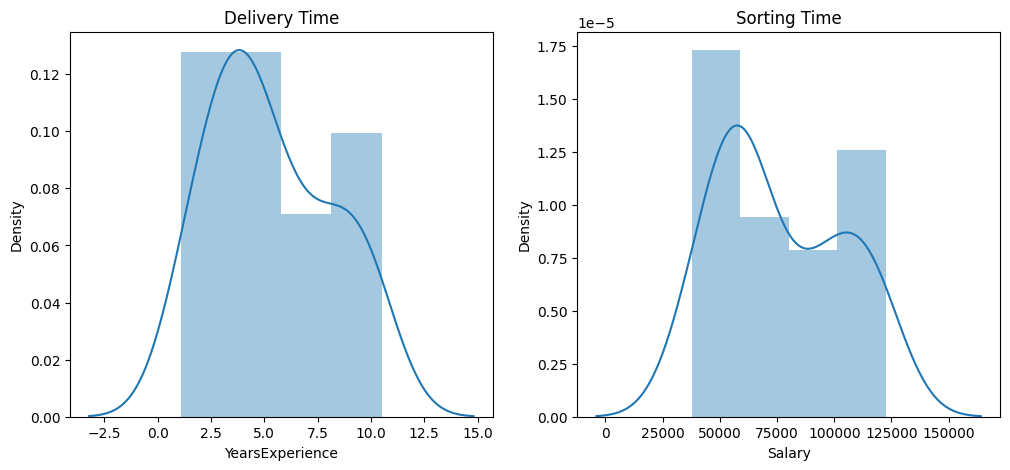

In [6]:
#Check for skewness
plt.subplots(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])
plt.title('Delivery Time')
plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.title('Sorting Time')
plt.show()

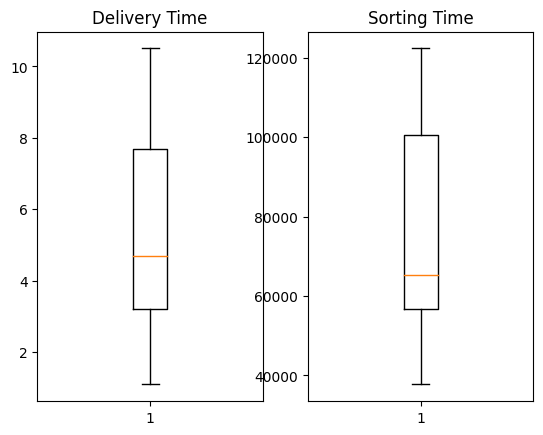

In [8]:
#Check for outliers
plt.subplot(1,2,1)
plt.boxplot(df['YearsExperience'])
plt.title('Delivery Time')
plt.subplot(1,2,2)
plt.boxplot(df['Salary'])
plt.title('Sorting Time')
plt.show()

No ouliers found

In [9]:
df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


High correlation is observed

**Model building**

**Model1: Model without any tranformation**

In [11]:
model=smf.ols("Salary~YearsExperience",data=df).fit() 
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.14e-20
Time:                        06:23:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Find tvalues and pvalues
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [14]:
# Find Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

**Model2: Regression model on log tranformed data**

In [16]:
import statsmodels.formula.api as sm

log_model = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()

Do prediction with both the models

In [20]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = df.YearsExperience
predicted['Actual_Salary'] = df.Salary
predicted['Pred_Salary']=model.predict(df['YearsExperience'])
#Find error without any tranformation
predicted['Error']=predicted['Actual_Salary'] - predicted['Pred_Salary']
#Inverse the log tranformed values by raising the values over exp for prediction
predicted['Predicted_Salary_log'] = pd.DataFrame(np.exp(log_model.predict(predicted.YearsExperience)))
#Find error with log any tranformation
predicted['Error_log']=predicted['Actual_Salary'] - predicted['Predicted_Salary_log']
predicted

,YearsExperience,Actual_Salary,Pred_Salary,Error,Predicted_Salary_log,Error_log
0,1.1,39343.0,36187.158752,3155.841248,32261.052293,7081.947707
1,1.3,46205.0,38077.151217,8127.848783,35437.122429,10767.877571
2,1.5,37731.0,39967.143681,-2236.143681,38405.293942,-674.293942
3,2.0,43525.0,44692.124842,-1167.124842,45145.842502,-1620.842502
4,2.2,39891.0,46582.117306,-6691.117306,47630.388981,-7739.388981
5,2.9,56642.0,53197.090931,3444.909069,55631.518478,1010.481522
6,3.0,60150.0,54142.087163,6007.912837,56701.779991,3448.220009
7,3.2,54445.0,56032.079627,-1587.079627,58796.479782,-4351.479782
8,3.2,64445.0,56032.079627,8412.920373,58796.479782,5648.520218
9,3.7,57189.0,60757.060788,-3568.060788,63795.788170,-6606.788170


In [19]:
from sklearn.metrics import mean_squared_error
log_model_pred_y =np.exp(log_model.predict(df['YearsExperience']))
Log__rmse =np.sqrt(mean_squared_error(predicted['Actual_Salary'], predicted['Predicted_Salary_log']))
Reg__rmse =np.sqrt(mean_squared_error(predicted['Actual_Salary'], predicted['Pred_Salary']))

print(Reg__rmse,'\n',Log__rmse)

5592.043608760662 
 7219.716974372806


**Finally,Regression model on log transformed data is proven better**